In [2]:
from __future__ import print_function
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from PIL import Image
from sklearn.externals import joblib
import torch
import torchaudio
import torchvision
from audio_records import EpicAudioRecord
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import PIL
import os
import h5py
import IPython.display as ipd
import pickle
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/mnt/storage/home/qc19291/anaconda3/envs/BlindCamera/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/mnt/storage/home/qc19291/anaconda3/envs/BlindCamera/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
def make_spec(audio_array, window_size, step_size):    
    nperseg = int(round(window_size * 24000 / 1e3))
    noverlap = int(round(step_size * 24000/ 1e3))

    fft_windows = librosa.stft(audio_array, n_fft=2048, hop_length=noverlap, win_length = nperseg)
    magnitude = np.abs(fft_windows)**2
    mel = librosa.filters.mel(sr=24000, n_fft=2048, n_mels=128)
    mel = mel.dot(magnitude)
    spec = librosa.power_to_db(mel, ref=np.max)
    return spec

def trim(record, audio_files):
    start = record.start_timestamp
    end = record.stop_timestamp

    start = datetime.datetime.strptime(start, "%H:%M:%S.%f")
    end = datetime.datetime.strptime(end, "%H:%M:%S.%f")

    end_timedelta = end - datetime.datetime(1900, 1, 1)
    start_timedelta = start - datetime.datetime(1900, 1, 1)

    end_seconds = end_timedelta.total_seconds()
    start_seconds = start_timedelta.total_seconds()

    start_sample = int(np.floor(start_seconds * 24000))
    end_sample = int(np.ceil(end_seconds * 24000))


    data_point = np.array(audio_files[record.untrimmed_video_name])
    data_point = data_point[start_sample:end_sample]
    return data_point

In [4]:
audio_files = os.getcwd() + '/../scratch/EPIC/EPIC_audio.hdf5'
train_path = os.getcwd() + '/../scratch/EPIC/epic-kitchens-100-annotations/EPIC_100_train.pkl'
h5 = h5py.File(audio_files, 'r')
with open(train_path, 'rb') as f:
            data = pickle.load(f)
            data = [EpicAudioRecord(tup) for tup in data.iterrows()]

open door
(128, 324)


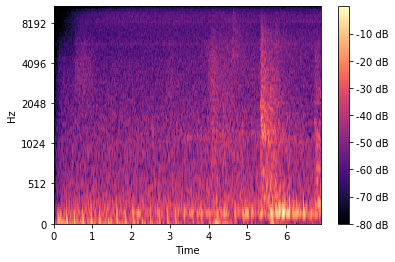

turn on light
(128, 181)


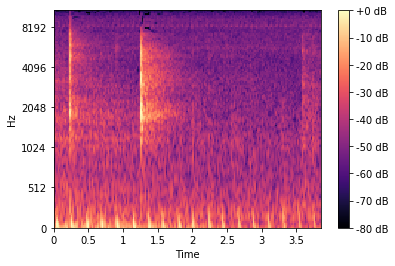

open drawer
(128, 124)


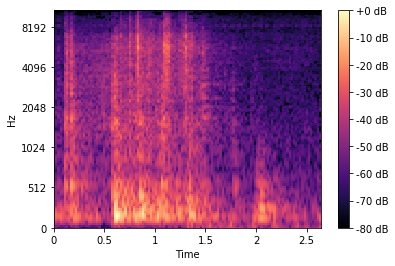

take cup
(128, 114)


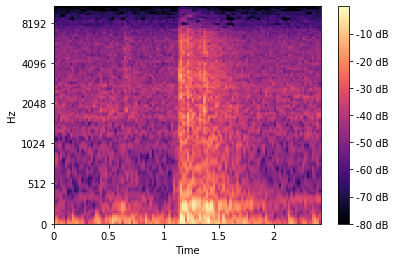

open cupboard
(128, 75)


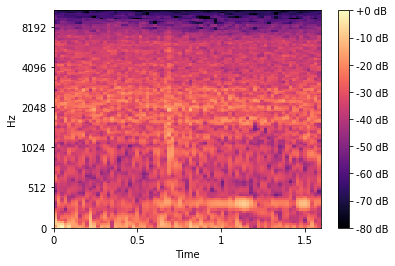

put cup into cupboard
(128, 88)


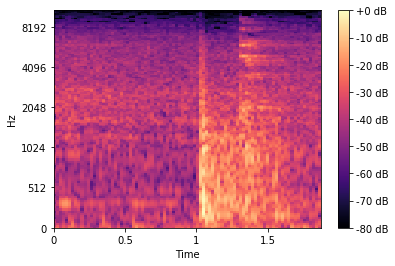

take container and lid
(128, 200)


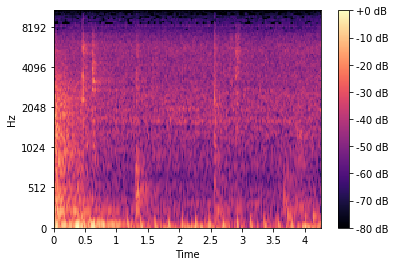

put container on top of counter
(128, 75)


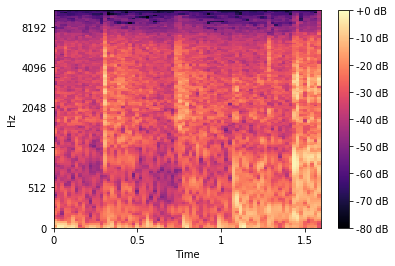

open container
(128, 75)


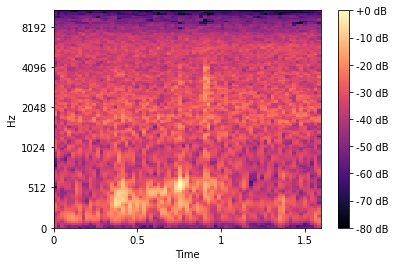

put container inside container
(128, 116)


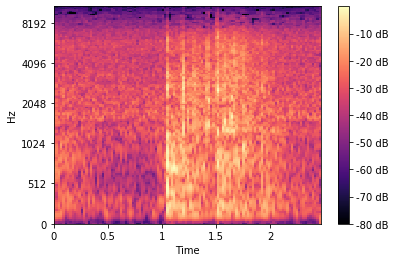

close lid
(128, 120)


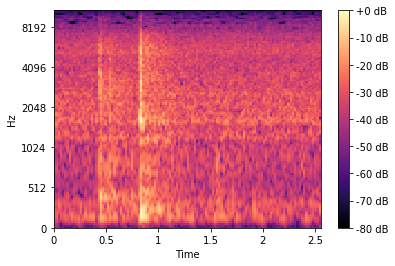

put container in cupboard
(128, 97)


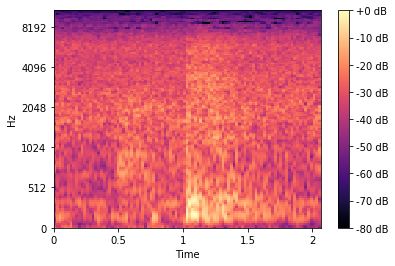

take plate
(128, 97)


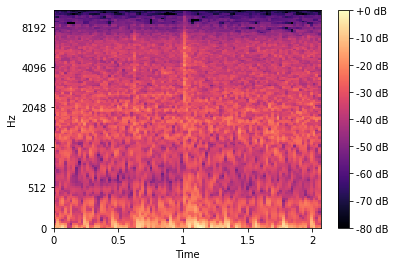

close fridge
(128, 211)


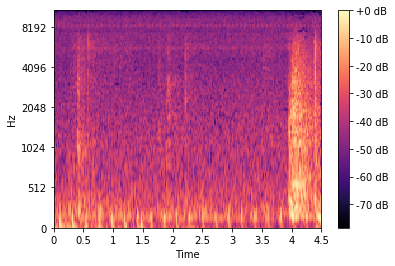

put plate down
(128, 327)


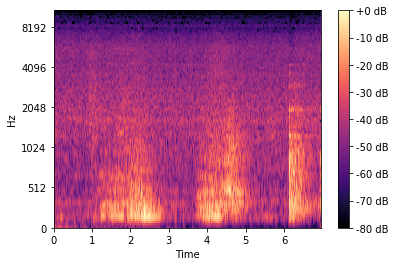

open drawer
(128, 179)


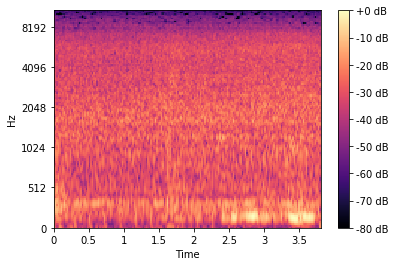

In [ ]:
for record in data:
    data_point = trim(record, h5)
    spec = make_spec(data_point, 20, 10)
    
    ipd.display(ipd.Audio(data_point, rate=24000))
    print(record.narration)
    print(np.shape(spec))
    librosa.display.specshow(spec, sr=24000, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
    plt.show() 
    input()

In [14]:
f2 = h5py.File('epic_subset.hdf5', 'w')
h5.copy('P01_01', f2)
h5.copy('P01_02', f2)
h5.copy('P01_03', f2)
h5.copy('P01_04', f2)
h5.copy('P01_05', f2)
h5.copy('P01_06', f2)
h5.copy('P01_07', f2)
h5.copy('P01_08', f2)
h5.copy('P01_09', f2)
h5.copy('P01_10', f2)
f2.close()

In [15]:
h5 = h5py.File('epic_subset.hdf5', 'r')
h5.keys()

<KeysViewHDF5 ['P01_01', 'P01_02', 'P01_03', 'P01_04', 'P01_05', 'P01_06', 'P01_07', 'P01_08', 'P01_09', 'P01_10']>